# Customer Segmentation - Using KMeans

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Preprocessing](#section3)
4. [Applying K-Means](#section4)<br>
    - 4.1 [Customer Segments](#section401)<br>
    - 4.2 [Adding the customer segment into the dataset](#section501)<br>

## 1. Problem Statement

The goal is to make __different segments of customers__ for the insurance using __KMeans__.

## 2. Data Loading and Description

- The dataset consists the information about the people for the customer segmentation. Various variables present in the data includes Customer gender,  Income Type, Price of goods etc.

- The dataset comprises of __600 observations of 14 columns__.

#### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda3\envs\gputest\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# 3. Data Preprocessing

In [2]:
cust_data = pd.read_csv("C:/Users/shrey/OneDrive/Desktop/Work/Final_Data/Customer_data_v2.csv")

In [3]:
cust_data.shape

(600, 14)

In [4]:
cust_data.head()

,Customer_id,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,Month,Year,Product,Brand,Rating,AMT_GOODS_PRICE,AMT_INCOME_TOTAL
0,1900001,F,N,Y,1,State servant,Secondary / secondary special,Apr,2019,Refrigerator,LG,8,32805,135000
1,1900002,M,Y,Y,1,Working,Secondary / secondary special,Apr,2019,Microwave,LG,8,11903,99000
2,1900003,M,N,Y,2,Pensioner,Secondary / secondary special,Apr,2019,WaterPurifier,LG,8,12628,202500
3,1900004,M,Y,N,0,Commercial associate,Secondary / secondary special,Apr,2019,Blender,LG,9,7671,315000
4,1900004,M,Y,N,0,Commercial associate,Secondary / secondary special,Apr,2019,Microwave,LG,7,12315,315000


In [5]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_id          600 non-null    int64 
 1   CODE_GENDER          600 non-null    object
 2   FLAG_OWN_CAR         600 non-null    object
 3   FLAG_OWN_REALTY      600 non-null    object
 4   CNT_CHILDREN         600 non-null    int64 
 5   NAME_INCOME_TYPE     600 non-null    object
 6   NAME_EDUCATION_TYPE  600 non-null    object
 7   Month                600 non-null    object
 8   Year                 600 non-null    int64 
 9   Product              600 non-null    object
 10  Brand                600 non-null    object
 11  Rating               600 non-null    int64 
 12  AMT_GOODS_PRICE      600 non-null    int64 
 13  AMT_INCOME_TOTAL     600 non-null    int64 
dtypes: int64(6), object(8)
memory usage: 65.8+ KB


In [6]:
cust_data.describe()

,Customer_id,CNT_CHILDREN,Year,Rating,AMT_GOODS_PRICE,AMT_INCOME_TOTAL
count,6.000000e+02,600.000000,600.0,600.000000,600.000000,600.00000
mean,1.900153e+06,0.365000,2019.0,8.153333,17714.585000,230322.49500
std,8.998748e+01,0.756789,0.0,0.790061,9801.171285,104776.24482
min,1.900001e+06,0.000000,2019.0,7.000000,5143.000000,40500.00000
25%,1.900071e+06,0.000000,2019.0,8.000000,10894.000000,157500.00000
50%,1.900157e+06,0.000000,2019.0,8.000000,12628.000000,225000.00000
75%,1.900230e+06,1.000000,2019.0,9.000000,27733.000000,282375.00000
max,1.900300e+06,8.000000,2019.0,10.000000,40000.000000,675000.00000


- Grouping the customers using Customer_id to find Mean Amount spent on goods purchased

In [7]:
mean_goods_price = cust_data.groupby(['Customer_id'])['AMT_GOODS_PRICE'].mean() # don't reset the index!
cust_data = cust_data.set_index(['Customer_id']) # make the same index here
cust_data['MEAN_AMT_GOODS_PRICE'] = mean_goods_price
cust_data = cust_data.reset_index() # to take the hierarchical index off again

In [8]:
cust_data.drop(['AMT_GOODS_PRICE'],axis=1, inplace=True)

In [9]:
cust_data.drop(['Brand','Month', 'Product', 'Rating'],axis=1, inplace=True)

In [10]:
cust_data.drop_duplicates(keep='first', inplace=True, ignore_index= True)

In [11]:
cust_data.head(600)

,Customer_id,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,Year,AMT_INCOME_TOTAL,MEAN_AMT_GOODS_PRICE
0,1900001,F,N,Y,1,State servant,Secondary / secondary special,2019,135000,32805.000000
1,1900002,M,Y,Y,1,Working,Secondary / secondary special,2019,99000,11903.000000
2,1900003,M,N,Y,2,Pensioner,Secondary / secondary special,2019,202500,12628.000000
3,1900004,M,Y,N,0,Commercial associate,Secondary / secondary special,2019,315000,17686.166667
4,1900005,M,Y,N,0,Working,Incomplete higher,2019,180000,6907.000000
...,...,...,...,...,...,...,...,...,...,...
295,1900296,F,Y,N,0,Working,Secondary / secondary special,2019,126000,30391.000000
296,1900297,M,Y,Y,0,Commercial associate,Secondary / secondary special,2019,315000,17686.166667
297,1900298,M,Y,N,0,Pensioner,Secondary / secondary special,2019,72000,12551.000000
298,1900299,M,N,N,0,Pensioner,Secondary / secondary special,2019,166500,25748.000000


In [12]:
col_cat = cust_data.select_dtypes(include='object').columns.tolist()
col_num = cust_data.select_dtypes(exclude='object').columns.tolist()

#### Getting unique values per columns for encoding purpose

In [13]:
for c in col_cat:
    print('Column {} unique values: {}'.format(c, len(cust_data[c].unique())))

Column CODE_GENDER unique values: 2
Column FLAG_OWN_CAR unique values: 2
Column FLAG_OWN_REALTY unique values: 2
Column NAME_INCOME_TYPE unique values: 4
Column NAME_EDUCATION_TYPE unique values: 4


#### One hot encoding for categorical features

In [14]:
cust_data2 = pd.get_dummies(cust_data, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'])


In [15]:
cust_data2.head()

,Customer_id,CNT_CHILDREN,Year,AMT_INCOME_TOTAL,MEAN_AMT_GOODS_PRICE,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,1900001,1,2019,135000,32805.000000,1,0,1,0,0,1,0,0,1,0,0,0,0,1
1,1900002,1,2019,99000,11903.000000,0,1,0,1,0,1,0,0,0,1,0,0,0,1
2,1900003,2,2019,202500,12628.000000,0,1,1,0,0,1,0,1,0,0,0,0,0,1
3,1900004,0,2019,315000,17686.166667,0,1,0,1,1,0,1,0,0,0,0,0,0,1
4,1900005,0,2019,180000,6907.000000,0,1,0,1,1,0,0,0,0,1,0,1,0,0


In [16]:
cust_data2.columns

Index(['Customer_id', 'CNT_CHILDREN', 'Year', 'AMT_INCOME_TOTAL',
       'MEAN_AMT_GOODS_PRICE', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special'],
      dtype='object')

In [17]:
#Selecting columns for clusterisation with k-means
selected_cols_categ = ["CODE_GENDER_M","CODE_GENDER_F","FLAG_OWN_CAR_N","FLAG_OWN_CAR_Y","NAME_INCOME_TYPE_Commercial associate","NAME_INCOME_TYPE_Pensioner","NAME_INCOME_TYPE_State servant","NAME_INCOME_TYPE_Working","CNT_CHILDREN","MEAN_AMT_GOODS_PRICE", "AMT_INCOME_TOTAL"]
cluster_data2 = cust_data2.loc[:,selected_cols_categ]

In [18]:
scaler = StandardScaler()
cluster_scaled2 = scaler.fit_transform(cluster_data2)

## Applying K-Means for Mixed Variables(Categorical and Continuous)

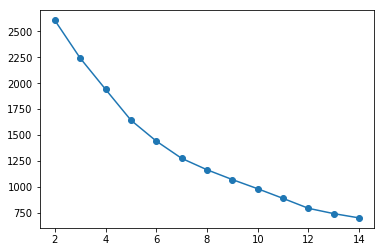

In [19]:
from sklearn.cluster import KMeans

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled2)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

__Observation__

- Using the elbow method, we are taking n = 5 clusters

## Selecting continuous variables for K-Means

In [20]:
#Selecting columns for clusterisation with k-means
selected_cols = ["MEAN_AMT_GOODS_PRICE", "AMT_INCOME_TOTAL"]
cluster_data = cust_data.loc[:,selected_cols]

In [21]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

# 4. Applying K-Means

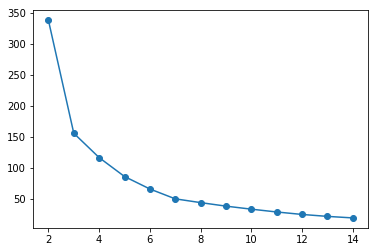

In [22]:
from sklearn.cluster import KMeans

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

__Observation__

- Using the elbow method, we are taking n = 3 clusters

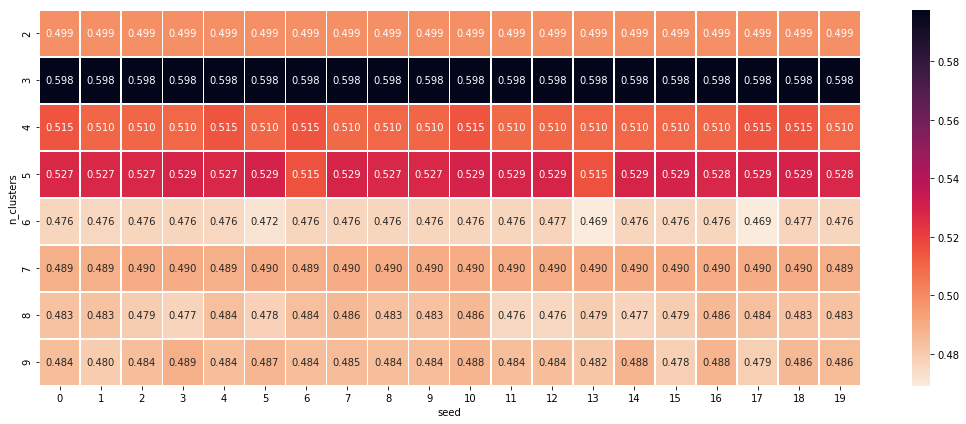

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,10)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

- As we can see 3 is the optimal number of clusters here, so clusters = 3 

#### Applying K-Means for no of clusters = 3

In [24]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

For n_clusters = 5  and seed = 19 
The average silhouette_score is : 0.5273249791951948


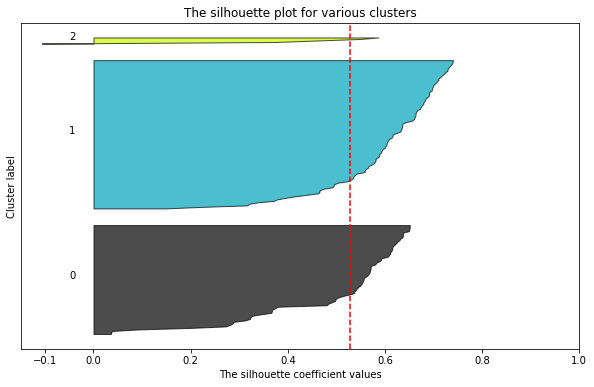

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

clusterer = KMeans(n_clusters=5, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 5," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

## 4.1 Customer Segments

In [26]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,MEAN_AMT_GOODS_PRICE,AMT_INCOME_TOTAL
Cluster,,
0,28790.4,138180.3
1,9776.8,140256.1
2,17857.2,300250.0


__Observations__

- __Cluster - 1__ - Group of people having high mean amount of purchase goods and low Income are __Careless customers__
- __Cluster - 2__ - Group of people having low mean amount of purchase goods and have high Income are __Sensible customers__
- __Cluster - 3__ - Group of people having high mean amount of purchase goods and have high Income are __Target customers__

## 4.2  Adding the customer segment into the dataset

In [27]:
cust_data['Labels'] = labels

In [28]:
def label_cluster (row):
    if row['Labels'] == 0 :
        return 'Careless Customer'
    if row['Labels'] == 1:
        return 'Sensible Customer'
    if row['Labels'] == 2 :
        return 'Target Customer'

In [29]:
cust_data['Customer Segment'] = cust_data.apply (lambda row: label_cluster(row), axis=1)

In [30]:
cust_data

,Customer_id,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,Year,AMT_INCOME_TOTAL,MEAN_AMT_GOODS_PRICE,Labels,Customer Segment
0,1900001,F,N,Y,1,State servant,Secondary / secondary special,2019,135000,32805.000000,0,Careless Customer
1,1900002,M,Y,Y,1,Working,Secondary / secondary special,2019,99000,11903.000000,1,Sensible Customer
2,1900003,M,N,Y,2,Pensioner,Secondary / secondary special,2019,202500,12628.000000,1,Sensible Customer
3,1900004,M,Y,N,0,Commercial associate,Secondary / secondary special,2019,315000,17686.166667,2,Target Customer
4,1900005,M,Y,N,0,Working,Incomplete higher,2019,180000,6907.000000,1,Sensible Customer
...,...,...,...,...,...,...,...,...,...,...,...,...
295,1900296,F,Y,N,0,Working,Secondary / secondary special,2019,126000,30391.000000,0,Careless Customer
296,1900297,M,Y,Y,0,Commercial associate,Secondary / secondary special,2019,315000,17686.166667,2,Target Customer
297,1900298,M,Y,N,0,Pensioner,Secondary / secondary special,2019,72000,12551.000000,1,Sensible Customer
298,1900299,M,N,N,0,Pensioner,Secondary / secondary special,2019,166500,25748.000000,0,Careless Customer


In [31]:
cust_data['Customer Segment'].value_counts()

Sensible Customer    147
Careless Customer     99
Target Customer       54
Name: Customer Segment, dtype: int64